
# Trabajo práctico integrador
# Análisis de datos 

## Authors:
- Karen Raczkowski
- Juan Ignacio Ribet
- FS


### 1. Introducción y motivación Les proponemos para este trabajo final realizar el análisis completo para un set de datos, para ello les vamos a proponer varios de estos y la idea es que ustedes elijan uno. Para dar un poco de noción sobre a qué corresponden estos datos, también vamos a presentar a que tipo de problema/etapa del análisis de datos corresponden

In [38]:
# Importamos librerías 
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import scipy.stats as stats

# Entrenamiento de modelos de prueba
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Evaluación de modelos de prueba
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error

# Partición de train-test set
from sklearn.model_selection import train_test_split

# Pipelines
from sklearn.pipeline import Pipeline

# Crear datasets
from sklearn.datasets import make_regression

# Esquemas de entrenamiento
from sklearn.model_selection import RepeatedStratifiedKFold, RepeatedKFold


# LEGO Database

- Preguntas interesantes para considerar aquí:
    - ¿Cómo evolucionaron los sets de lego en tamaño a través de los años?
    - ¿Existe alguna asociación entre los colores y las temáticas?
    - ¿Podría predecir a que temática pertenece un set basado en el contenido de este? (recomendado)
    - A través de los años, ¿Cuál o cuáles son los sets que tienen las piezas más raras?

![Data set Schema](https://rebrickable.com/static/img/diagrams/downloads_schema_v3.png)

In [39]:
url_themes = 'https://cdn.rebrickable.com/media/downloads/themes.csv.gz'
url_colors = 'https://cdn.rebrickable.com/media/downloads/colors.csv.gz'
url_part_categories = 'https://cdn.rebrickable.com/media/downloads/part_categories.csv.gz'
url_parts = 'https://cdn.rebrickable.com/media/downloads/parts.csv.gz'
url_part_relationships = 'https://cdn.rebrickable.com/media/downloads/part_relationships.csv.gz'
url_elements = 'https://cdn.rebrickable.com/media/downloads/elements.csv.gz'
url_sets ='https://cdn.rebrickable.com/media/downloads/sets.csv.gz'
url_minifigs = 'https://cdn.rebrickable.com/media/downloads/minifigs.csv.gz'
url_inventories = 'https://cdn.rebrickable.com/media/downloads/inventories.csv.gz'
url_inventory_parts = 'https://cdn.rebrickable.com/media/downloads/inventory_parts.csv.gz'
url_inventory_sets = 'https://cdn.rebrickable.com/media/downloads/inventory_sets.csv.gz'
url_inventory_minifigs = 'https://cdn.rebrickable.com/media/downloads/inventory_minifigs.csv.gz'

In [40]:
themes = pd.read_csv(url_themes, delimiter=',') #(3.9 KB)
colors = pd.read_csv(url_colors, delimiter=',') #(2.5 KB)
part_categories = pd.read_csv(url_part_categories, delimiter=',') #(725 bytes)
parts = pd.read_csv(url_parts, delimiter=',') #(839.0 KB)
part_relationships = pd.read_csv(url_part_relationships, delimiter=',') #(149.0 KB)
elements = pd.read_csv(url_elements, delimiter=',') #(586.8 KB)
sets = pd.read_csv(url_sets, delimiter=',') #(379.9 KB)
minifigs = pd.read_csv(url_minifigs, delimiter=',') #(223.2 KB)
inventories = pd.read_csv(url_inventories, delimiter=',') #(194.1 KB)
inventory_parts = pd.read_csv(url_inventory_parts, delimiter=',') #(9.9 MB)
inventory_sets = pd.read_csv(url_inventory_sets, delimiter=',') #(14.1 KB)
inventory_minifigs = pd.read_csv(url_inventory_minifigs, delimiter=',') #(76.2 KB)

In [41]:
themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,3,Competition,1.0
2,4,Expert Builder,1.0
3,16,RoboRiders,1.0
4,17,Speed Slammers,1.0


In [42]:
colors.head()

,id,name,rgb,is_trans
0,-1,[Unknown],0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [43]:
part_categories.head()

,id,name
0,1,Baseplates
1,3,Bricks Sloped
2,4,"Duplo, Quatro and Primo"
3,5,Bricks Special
4,6,Bricks Wedged


In [44]:
parts.head()

,part_num,name,part_cat_id,part_material
0,003381,Sticker Sheet for Set 663-1,58,Plastic
1,003383,"Sticker Sheet for Sets 618-1, 628-2",58,Plastic
2,003402,"Sticker Sheet for Sets 310-3, 311-1, 312-3",58,Plastic
3,003429,Sticker Sheet for Set 1550-1,58,Plastic
4,003432,"Sticker Sheet for Sets 357-1, 355-1, 940-1",58,Plastic


In [45]:
part_relationships.head()

,rel_type,child_part_num,parent_part_num
0,P,3626cpr3662,3626c
1,P,87079pr9974,87079
2,P,3960pr9971,3960
3,R,98653pr0003,98086pr0003
4,R,98653pr0003,98088pat0003


In [46]:
elements.head()

,element_id,part_num,color_id
0,6300211,67906c01,14
1,4566309,2564,0
2,4275423,53657,1004
3,6194308,92926,71
4,6229123,26561,4


In [47]:
sets.head()

,set_num,name,year,theme_id,num_parts,img_url
0,001-1,Gears,1965,1,43,https://cdn.rebrickable.com/media/sets/001-1.jpg
1,0011-2,Town Mini-Figures,1979,67,12,https://cdn.rebrickable.com/media/sets/0011-2.jpg
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0,https://cdn.rebrickable.com/media/sets/0011-3.jpg
3,0012-1,Space Mini-Figures,1979,143,12,https://cdn.rebrickable.com/media/sets/0012-1.jpg
4,0013-1,Space Mini-Figures,1979,143,12,https://cdn.rebrickable.com/media/sets/0013-1.jpg


In [48]:
minifigs.head()

,fig_num,name,num_parts,img_url
0,fig-000001,Toy Store Employee,4,https://cdn.rebrickable.com/media/sets/fig-000...
1,fig-000002,Customer Kid,4,https://cdn.rebrickable.com/media/sets/fig-000...
2,fig-000003,"Assassin Droid, White",8,https://cdn.rebrickable.com/media/sets/fig-000...
3,fig-000004,"Man, White Torso, Black Legs, Brown Hair",4,https://cdn.rebrickable.com/media/sets/fig-000...
4,fig-000005,Captain America with Short Legs,3,https://cdn.rebrickable.com/media/sets/fig-000...


In [49]:
inventories.head()

,id,version,set_num
0,1,1,7922-1
1,3,1,3931-1
2,4,1,6942-1
3,15,1,5158-1
4,16,1,903-1


In [50]:
inventory_parts.head()

,inventory_id,part_num,color_id,quantity,is_spare,img_url
0,1,48379c01,72,1,f,https://cdn.rebrickable.com/media/parts/photos...
1,1,48395,7,1,f,https://cdn.rebrickable.com/media/parts/photos...
2,1,stickerupn0077,9999,1,f,NaN
3,1,upn0342,0,1,f,NaN
4,1,upn0350,25,1,f,NaN


In [51]:
inventory_sets.head()

,inventory_id,set_num,quantity
0,35,75911-1,1
1,35,75912-1,1
2,39,75048-1,1
3,39,75053-1,1
4,50,4515-1,1


In [52]:
inventory_minifigs.head()

,inventory_id,fig_num,quantity
0,3,fig-001549,1
1,4,fig-000764,1
2,19,fig-000555,1
3,25,fig-000574,1
4,26,fig-000842,1


## ¿Cómo evolucionaron los sets de lego en tamaño a través de los años?

In [53]:
year = sets['year'].sort_values().unique()

#Calculate the 'num_parts' mean of each year 
sets_mean_size_year = np.array(sets[['year','num_parts']].groupby(by='year').mean())[:,0].round(0)

In [54]:
sets_size_evolution = pd.DataFrame(sets_mean_size_year, year, columns=['sets_mean_size'])
sets_size_evolution

,sets_mean_size
1949,100.0
1950,1.0
1953,12.0
1954,8.0
1955,12.0
...,...
2019,189.0
2020,210.0
2021,233.0
2022,285.0


In [55]:
sets_size_evolution.describe().round(0)

,sets_mean_size
count,73.0
mean,113.0
std,58.0
min,1.0
25%,81.0
50%,106.0
75%,151.0
max,285.0


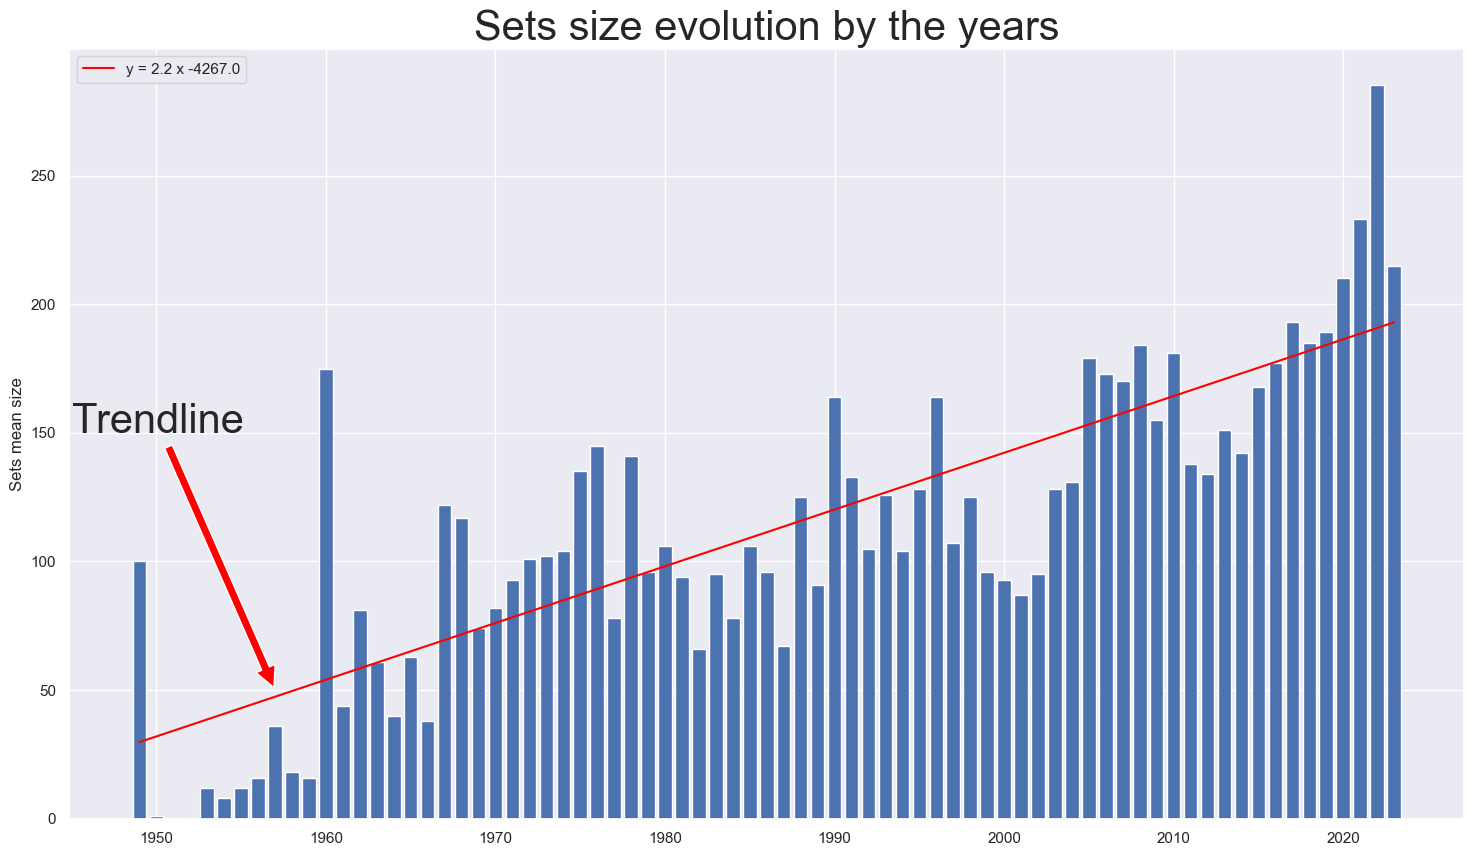

In [56]:
z = np.polyfit(year, sets_mean_size_year, 1)
p = np.poly1d(z)

fig, ax = plt.subplots(figsize=(18,10))
ax.bar(year, sets_mean_size_year)
ax.set_ylabel('Sets mean size')
ax.plot(year, p(year), c='red', label = f'y = {p.c.round(2)[0]} x {p.c.round(0)[1]}')
ax.set_title('Sets size evolution by the years',fontsize=30)
ax.annotate('Trendline',(1957,50), xytext=(1945,150), fontsize=30, arrowprops=dict(arrowstyle='simple', facecolor='red'))
ax.legend(loc='upper left')
plt.show()

## ¿Existe alguna asociación entre los colores y las temáticas?

In [57]:
#Change names of the columns 'id' and 'name' for 'theme_id' and 'theme_name' in the themes set
themes.rename(columns = {'id':'theme_id', 'name':'theme_name'}, inplace = True)
themes.head()

,theme_id,theme_name,parent_id
0,1,Technic,NaN
1,3,Competition,1.0
2,4,Expert Builder,1.0
3,16,RoboRiders,1.0
4,17,Speed Slammers,1.0


In [58]:
#Merge the datasets 'sets' with 'themes' by the column "theme_id" in the set 'sets_themes'
sets_themes = pd.merge(sets, themes, on="theme_id")
sets_themes

,set_num,name,year,theme_id,num_parts,img_url,theme_name,parent_id
0,001-1,Gears,1965,1,43,https://cdn.rebrickable.com/media/sets/001-1.jpg,Technic,NaN
1,002-1,4.5V Samsonite Gears Motor Set,1965,1,3,https://cdn.rebrickable.com/media/sets/002-1.jpg,Technic,NaN
2,1030-1,TECHNIC I: Simple Machines Set,1985,1,210,https://cdn.rebrickable.com/media/sets/1030-1.jpg,Technic,NaN
3,1038-1,ERBIE the Robo-Car,1985,1,120,https://cdn.rebrickable.com/media/sets/1038-1.jpg,Technic,NaN
4,1039-1,Manual Control Set 1,1986,1,39,https://cdn.rebrickable.com/media/sets/1039-1.jpg,Technic,NaN
...,...,...,...,...,...,...,...,...
21194,M20-2566-10,Modulex Box - 10x Window 1 x 6 x 6,1963,716,10,https://cdn.rebrickable.com/media/sets/m20-256...,Modulex,NaN
21195,M20-2575-10,Modulex Box - 10x Window 1 x 7 x 5,1963,716,10,https://cdn.rebrickable.com/media/sets/m20-257...,Modulex,NaN
21196,M20-2576-10,Modulex Box - 10x Window 1 x 7 x 6,1963,716,10,https://cdn.rebrickable.com/media/sets/m20-257...,Modulex,NaN
21197,M20-2586-10,Modulex Box - 10x Window 1 x 8 x 6,1963,716,10,https://cdn.rebrickable.com/media/sets/m20-258...,Modulex,NaN


In [59]:
#Delete the columns 'img_url' and 'parent_id' of the set 'sets_themes'
sets_themes = sets_themes.drop(columns=['img_url','parent_id'])
sets_themes

,set_num,name,year,theme_id,num_parts,theme_name
0,001-1,Gears,1965,1,43,Technic
1,002-1,4.5V Samsonite Gears Motor Set,1965,1,3,Technic
2,1030-1,TECHNIC I: Simple Machines Set,1985,1,210,Technic
3,1038-1,ERBIE the Robo-Car,1985,1,120,Technic
4,1039-1,Manual Control Set 1,1986,1,39,Technic
...,...,...,...,...,...,...
21194,M20-2566-10,Modulex Box - 10x Window 1 x 6 x 6,1963,716,10,Modulex
21195,M20-2575-10,Modulex Box - 10x Window 1 x 7 x 5,1963,716,10,Modulex
21196,M20-2576-10,Modulex Box - 10x Window 1 x 7 x 6,1963,716,10,Modulex
21197,M20-2586-10,Modulex Box - 10x Window 1 x 8 x 6,1963,716,10,Modulex


In [60]:
#Merge the datasets 'sets_themes' with 'inventories' by the column "set_num"
sets_themes_inv = pd.merge(inventories, sets_themes,  on="set_num")
sets_themes_inv

,id,version,set_num,name,year,theme_id,num_parts,theme_name
0,1,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,5,Gravity Games
1,3,1,3931-1,Emma's Splash Pool,2012,494,43,Friends
2,4,1,6942-1,Zo Weevil,1999,134,20,Insectoids
3,15,1,5158-1,"T-Junction, Circle Plates",1990,443,2,Service Packs
4,16,1,903-1,Train Wheels and Couplers,1969,371,10,Supplemental
...,...,...,...,...,...,...,...,...
22805,176404,1,853750-1,Lloyd Dress-Up,2018,737,0,Role Play Toys and Costumes
22806,176406,1,853806-1,Lion Knight Dress-Up,2018,737,0,Role Play Toys and Costumes
22807,176407,1,853803-1,Princess Dress-Up,2018,737,0,Role Play Toys and Costumes
22808,176408,1,853808-1,Dragon Shield,2018,737,0,Role Play Toys and Costumes


In [61]:
#Change names of the columns 'inventory_id' for 'id' in the 'inventory_parts' set
inventory_parts.rename(columns = {'inventory_id':'id'}, inplace = True)
inventory_parts

,id,part_num,color_id,quantity,is_spare,img_url
0,1,48379c01,72,1,f,https://cdn.rebrickable.com/media/parts/photos...
1,1,48395,7,1,f,https://cdn.rebrickable.com/media/parts/photos...
2,1,stickerupn0077,9999,1,f,NaN
3,1,upn0342,0,1,f,NaN
4,1,upn0350,25,1,f,NaN
...,...,...,...,...,...,...
1125668,176399,6575,72,4,f,https://cdn.rebrickable.com/media/parts/elemen...
1125669,176399,6589,19,2,f,https://cdn.rebrickable.com/media/parts/elemen...
1125670,176399,6632,71,2,f,https://cdn.rebrickable.com/media/parts/elemen...
1125671,176399,66906,0,4,f,https://cdn.rebrickable.com/media/parts/elemen...


In [62]:
#Merge the datasets 'inventory_parts' with 'sets_themes_inv' by the column "id"
result = pd.merge(inventory_parts, sets_themes_inv, on="id")
result

,id,part_num,color_id,quantity,is_spare,img_url,version,set_num,name,year,theme_id,num_parts,theme_name
0,1,48379c01,72,1,f,https://cdn.rebrickable.com/media/parts/photos...,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,5,Gravity Games
1,1,48395,7,1,f,https://cdn.rebrickable.com/media/parts/photos...,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,5,Gravity Games
2,1,stickerupn0077,9999,1,f,NaN,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,5,Gravity Games
3,1,upn0342,0,1,f,NaN,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,5,Gravity Games
4,1,upn0350,25,1,f,NaN,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,5,Gravity Games
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1064285,176399,6575,72,4,f,https://cdn.rebrickable.com/media/parts/elemen...,1,2000426-1,Mindstorms EV3 Element Accessory Pack,2014,518,108,Mindstorms
1064286,176399,6589,19,2,f,https://cdn.rebrickable.com/media/parts/elemen...,1,2000426-1,Mindstorms EV3 Element Accessory Pack,2014,518,108,Mindstorms
1064287,176399,6632,71,2,f,https://cdn.rebrickable.com/media/parts/elemen...,1,2000426-1,Mindstorms EV3 Element Accessory Pack,2014,518,108,Mindstorms
1064288,176399,66906,0,4,f,https://cdn.rebrickable.com/media/parts/elemen...,1,2000426-1,Mindstorms EV3 Element Accessory Pack,2014,518,108,Mindstorms


In [63]:
#Delete the columns 'quantity', 'is_spare' and 'img_url' of the set 'result'
result = result.drop(columns=['quantity','is_spare','img_url'])
result

,id,part_num,color_id,version,set_num,name,year,theme_id,num_parts,theme_name
0,1,48379c01,72,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,5,Gravity Games
1,1,48395,7,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,5,Gravity Games
2,1,stickerupn0077,9999,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,5,Gravity Games
3,1,upn0342,0,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,5,Gravity Games
4,1,upn0350,25,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,5,Gravity Games
...,...,...,...,...,...,...,...,...,...,...
1064285,176399,6575,72,1,2000426-1,Mindstorms EV3 Element Accessory Pack,2014,518,108,Mindstorms
1064286,176399,6589,19,1,2000426-1,Mindstorms EV3 Element Accessory Pack,2014,518,108,Mindstorms
1064287,176399,6632,71,1,2000426-1,Mindstorms EV3 Element Accessory Pack,2014,518,108,Mindstorms
1064288,176399,66906,0,1,2000426-1,Mindstorms EV3 Element Accessory Pack,2014,518,108,Mindstorms


In [64]:
#create the data set 'Theme_color'
Theme_color = result[['color_id', 'theme_name']]

In [65]:
#group the 'Theme_color' dataset by the 'theme_name' and count the quantity of diferente colors of the parts
colors_themes = pd.DataFrame(Theme_color.groupby(by='theme_name').apply(lambda x: x['color_id'].value_counts()))
colors_themes

count
theme_name color_id       
12V        0           602
           7           346
           4           308
           15          119
           14          119
...                    ...
eLAB       2             5
           15            4
           288           3
           19            1
           47            1

[11021 rows x 1 columns]

In [66]:
#Create a dic with the keys:'theme name' and value:'most common color of the theme' 
first_color_theme={}
for i in Theme_color['theme_name'].unique():
    first_color_theme[i] = colors_themes.loc[i].iloc[0][0]
first_color_theme

{'Gravity Games': 59,
 'Friends': 10949,
 'Insectoids': 233,
 'Service Packs': 680,
 'Supplemental': 828,
 'Creator': 1782,
 'Bulk Bricks': 79,
 'Star Wars': 17740,
 'Disney Series 1': 18,
 'Town Jr.': 421,
 'Desert': 329,
 'Police': 2971,
 'Train': 249,
 'Classic Town': 5396,
 'The LEGO Batman Movie Series 1': 25,
 'Universal Building Set': 667,
 'Bionicle': 2901,
 'Educational and Dacta': 1235,
 'Magnets': 61,
 'Easter': 310,
 'Classic Basic': 652,
 'Harry Potter': 3466,
 'Ultimate Collector Series': 3454,
 'World City': 642,
 'Batman': 3167,
 'Blacktron II': 700,
 'Dino Island': 153,
 'Arctic': 484,
 'Exo-Force': 1199,
 'Clocks and Watches': 251,
 'The LEGO Movie': 813,
 'Creator 3-in-1': 4411,
 'Creator Expert': 2740,
 'Belville': 990,
 'Racers': 3204,
 'Designer Sets': 702,
 'Basic': 1873,
 'Space Port': 230,
 'Cars': 751,
 'Bricktober': 295,
 'Dimensions': 627,
 'Series 3 Minifigures': 20,
 'Series 12 Minifigures': 18,
 'Airport': 1005,
 'Technic': 14521,
 'Mission Deep Freeze': 

In [67]:
first_color_theme_df = pd.DataFrame([first_color_theme.values(), first_color_theme.keys()], index=['color', 'theme']).T
first_color_theme_df 

,color,theme
0,59,Gravity Games
1,10949,Friends
2,233,Insectoids
3,680,Service Packs
4,828,Supplemental
...,...,...
366,18,The Muppets
367,285,Avatar
368,12,Series 23 Minifigures
369,14,Series 24 Minifigures
